In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns

In [13]:
data = load_breast_cancer()
description = data.DESCR.split('\n')
print ('\n'.join(description[11:31]))

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - class:
            - WDBC-Malignant
            - WDBC-Benign


In [14]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.shape

(569, 31)

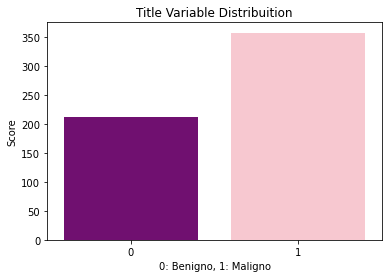

In [22]:
sns.countplot(x='target', data=df, palette=['purple', 'pink'])
plt.title('Title Variable Distribuition')
plt.xlabel('0: Benigno, 1: Maligno')
plt.ylabel('Score')
plt.show()

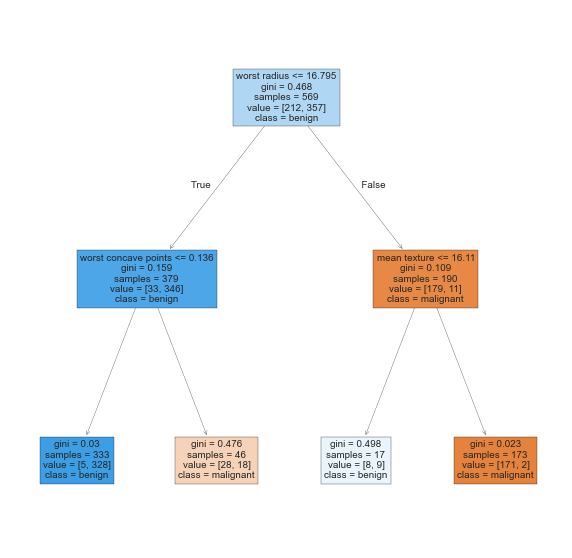

In [43]:
clf = DecisionTreeClassifier(max_depth=2)
x = data.data
y = data.target
clf.fit(x, y)
plt.figure(figsize=(10,10))
plot_tree(clf, filled=True, feature_names = data.feature_names, class_names = data.target_names)
plt.show()


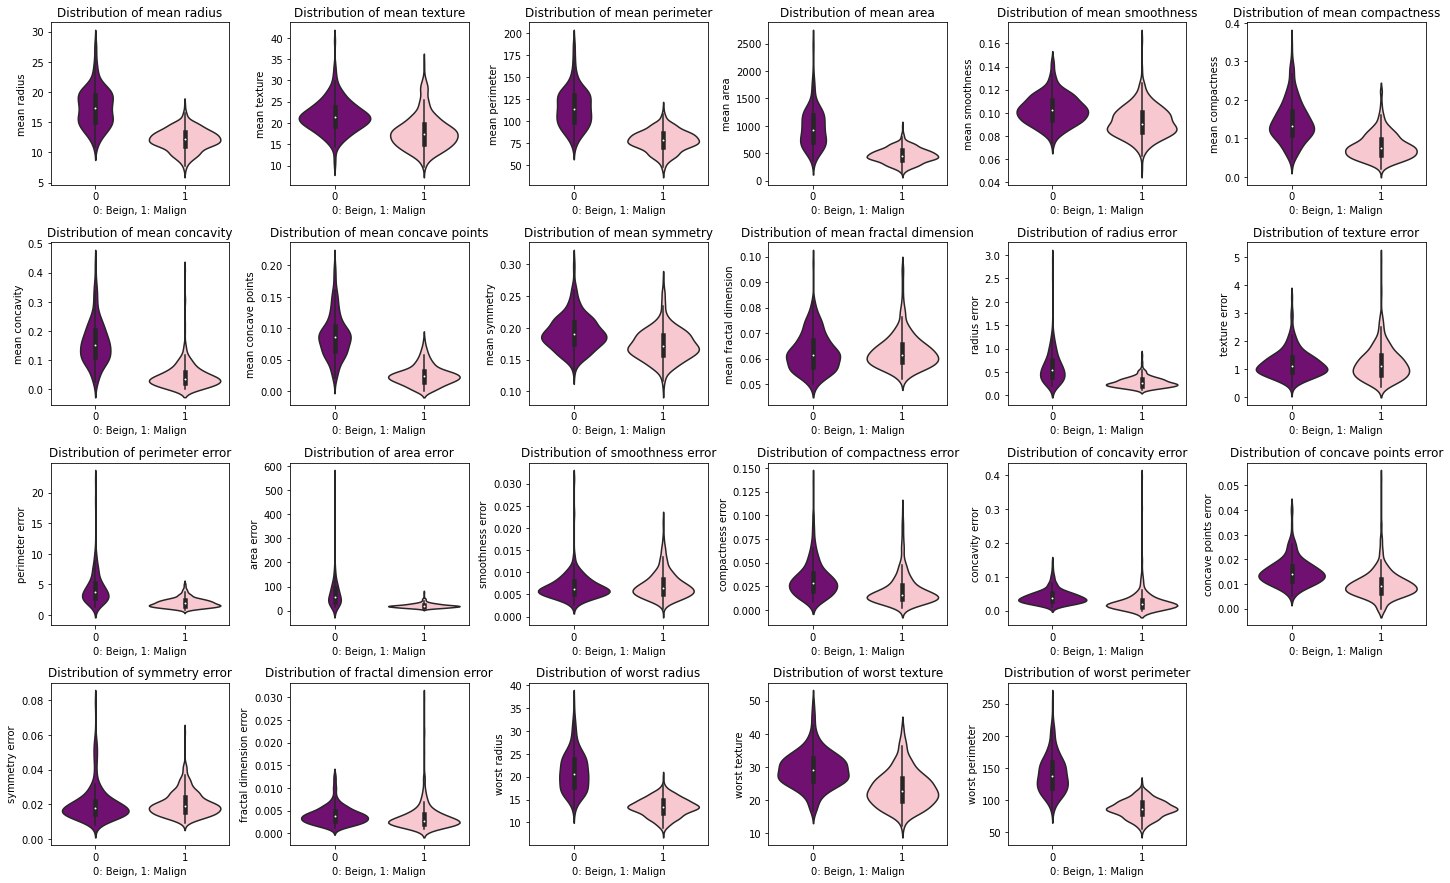

In [24]:
features = df.columns[:-1]
fig, axs = plt.subplots(nrows = 5, ncols =6, figsize=(20,15))
axs = axs.flatten()
for i, features in enumerate (features):
    sns.violinplot(x = 'target', y = features, data = df, split = False, ax = axs[i], palette=['purple', 'pink'])
    axs[i].set_title(f'Distribution of {features}')
    axs[i].set_xlabel('0: Beign, 1: Malign')
    axs[i].set_ylabel(features)
    
for i in range(len(features), len(axs)):
    axs[i].remove()
    
plt.tight_layout()
plt.show()

In [25]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [29]:
from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size=0.25, random_state=0)

In [31]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C= 2)
svm.fit(x_treinamento, y_treinamento)

SVC(C=2, kernel='linear')

In [32]:
previsoes = svm.predict(x_teste)
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_teste, previsoes)

0.958041958041958

0.958041958041958

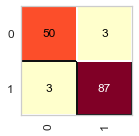

In [33]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(2,2))
cm = ConfusionMatrix(svm)
cm.fit(x_treinamento, y_treinamento)
cm.score(x_teste, y_teste)

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
x_treinamento_pca = pca.fit_transform(x_treinamento)
x_teste_pca = pca.transform(x_teste)
x_treinamento_pca

array([[-2.8380771 , -0.3193802 , -0.50978696,  0.22007787, -0.52742285],
       [-3.23881077,  0.94669515,  1.4630147 ,  0.84543648, -3.50859759],
       [ 3.92831902, -3.3009157 ,  1.84183164,  2.83333596, -0.09483364],
       ...,
       [-3.17962251,  0.43326773,  0.57700503,  0.11186201, -0.75630282],
       [-5.59141525, -0.75288918,  4.06478207,  2.61732114, -0.95172627],
       [-1.20802261,  1.32965049,  1.26115052,  3.49517444,  1.34529382]])

In [39]:
svm_pca = SVC(kernel = 'linear', C= 2)
svm_pca.fit(x_treinamento_pca, y_treinamento)

SVC(C=2, kernel='linear')

In [41]:
previsoes = svm_pca.predict(x_teste_pca)
accuracy_score(y_teste, previsoes)

0.965034965034965

# SELEÇÃO DE ATRIBUTOS 

In [45]:
from sklearn.feature_selection import f_classif, SelectKBest

selecao = SelectKBest(f_classif, k=7)
x_anova = selecao.fit_transform(x, y)

In [68]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_anova, y, test_size=0.3, random_state=42)
svm_anova = SVC(kernel = 'linear', C = 2)
svm_anova.fit(x_treino, y_treino)

SVC(C=2, kernel='linear')

In [69]:
previsoes = svm_anova.predict(x_teste)
accuracy_score(y_teste, previsoes)

0.9883040935672515

In [70]:
from sklearn.model_selection import GridSearchCV
parametros ={'C':[1.0, 1.5, 2.0],
            'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [71]:
grid_search = GridSearchCV(estimator = SVC(), param_grid = parametros)
grid_search.fit(x,y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 2.0, 'kernel': 'linear'}
0.952585002328831


In [72]:
parametros = {'n_estimators' : [10, 40, 100, 150, 200]}

In [73]:
from sklearn.ensemble import RandomForestClassifier
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parametros)
grid_search.fit(x, y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 40, 100, 150, 200]})

# CROSS VALIDATION

In [74]:
from sklearn.model_selection import cross_val_score, KFold

In [75]:
resultados_svm = []

for i in range(30):
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    svm = SVC(kernel = 'rbf', C = 1.5)
    scores = cross_val_score(svm, x, y, cv = kfold)
    resultados_svm.append(scores.mean())

In [76]:
resultados_svm

[0.9208333333333332,
 0.919110275689223,
 0.9174185463659148,
 0.9227130325814535,
 0.9156328320802005,
 0.9224310776942357,
 0.9157268170426065,
 0.9174498746867167,
 0.9173872180451127,
 0.9192042606516291,
 0.918984962406015,
 0.9209273182957393,
 0.9157268170426065,
 0.9156641604010025,
 0.9156015037593985,
 0.9120927318295738,
 0.9226817042606517,
 0.9190476190476191,
 0.9174498746867167,
 0.9192042606516291,
 0.9192042606516291,
 0.9139724310776941,
 0.9173558897243108,
 0.9173872180451129,
 0.9174498746867167,
 0.924436090225564,
 0.9227443609022556,
 0.9157268170426065,
 0.9191729323308271,
 0.9173245614035087]

In [77]:
print('Acurácia média geral: ', np.mean(resultados_svm))
print('Desvio padrão: ', np.std(resultados_svm))

Acurácia média geral:  0.9183354218880535
Desvio padrão:  0.002806219459535343
